In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Data Subsample

In [2]:
data = pd.read_csv('covtype.csv')

In [3]:
# Counts of each cover type
data.groupby('Cover_Type').count()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,...,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840
2,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,...,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301
3,35754,35754,35754,35754,35754,35754,35754,35754,35754,35754,...,35754,35754,35754,35754,35754,35754,35754,35754,35754,35754
4,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,...,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747
5,9493,9493,9493,9493,9493,9493,9493,9493,9493,9493,...,9493,9493,9493,9493,9493,9493,9493,9493,9493,9493
6,17367,17367,17367,17367,17367,17367,17367,17367,17367,17367,...,17367,17367,17367,17367,17367,17367,17367,17367,17367,17367
7,20510,20510,20510,20510,20510,20510,20510,20510,20510,20510,...,20510,20510,20510,20510,20510,20510,20510,20510,20510,20510


In [4]:
# Randomly select the same amount of data from 7 classes
subdata = data.groupby('Cover_Type').sample(2000, replace=False, random_state=1)
subdata.to_csv('subdata.csv')
subdata

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
49799,3160,347,13,127,15,4621,196,219,162,3139,...,0,0,0,0,0,0,0,0,0,1
155024,3100,352,9,170,14,5367,205,225,158,1167,...,0,0,0,0,0,0,0,0,0,1
561194,2675,31,11,212,20,3360,217,216,133,3072,...,0,0,0,0,0,0,0,0,0,1
327281,3088,43,8,0,0,1611,222,222,136,674,...,0,0,0,0,0,0,0,0,0,1
363436,3061,113,22,150,19,696,251,212,78,742,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235507,3298,80,12,30,5,2247,236,219,113,2797,...,0,0,0,0,0,0,0,1,0,7
468040,3342,250,7,150,6,4590,205,245,179,3467,...,0,0,0,1,0,0,0,0,0,7
500780,3201,67,21,30,10,1533,236,194,81,769,...,0,0,0,0,0,0,0,1,0,7
470861,3307,9,12,484,102,2800,206,215,146,2268,...,0,0,0,0,0,0,1,0,0,7


#  Data Preparation

In [5]:
pd.set_option('display.max_columns', None) # See all columns
subdata.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.00000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.0,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.0,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,2749.664143,157.528857,16.540071,228.032714,50.871500,1724.522000,212.548429,219.017357,135.23500,1512.026571,0.235714,0.037143,0.415714,0.311429,0.022071,0.043071,0.063571,0.053643,0.011286,0.042786,0.000071,0.0,0.000786,0.140929,0.028071,0.015500,0.030929,0.012214,0.0,0.007786,0.038929,0.002786,0.003714,0.008143,0.000500,0.024071,0.051143,0.015714,0.000143,0.003929,0.001214,0.000643,0.088571,0.046143,0.022929,0.045000,0.040429,0.002071,0.006643,0.000571,0.002357,0.047571,0.043286,0.030786,4.000000
std,419.956465,110.184110,8.501528,209.221352,61.159782,1345.180394,30.894095,22.666527,46.01544,1091.145581,0.424460,0.189119,0.492862,0.463094,0.146921,0.203025,0.243997,0.225320,0.105637,0.202381,0.008452,0.0,0.028021,0.347960,0.165183,0.123535,0.173130,0.109845,0.0,0.087896,0.193432,0.052708,0.060834,0.089873,0.022356,0.153276,0.220297,0.124372,0.011952,0.062557,0.034827,0.025347,0.284134,0.209802,0.149681,0.207312,0.196969,0.045467,0.081235,0.023899,0.048495,0.212865,0.203507,0.172743,2.000071
min,1872.000000,0.000000,0.000000,0.000000,-137.000000,0.000000,0.000000,98.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2372.000000,66.000000,10.000000,67.000000,5.000000,752.000000,196.000000,207.000000,107.00000,738.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2759.000000,127.000000,15.000000,180.000000,32.000000,1312.000000,220.000000,223.000000,138.00000,1265.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3108.000000,263.

* Count is 17500 for each column, so no data point is missing.
* Each value of soil type 8&15 is zero, so they can be removed.

In [6]:
# Removing Soil_Type8 and Soil_type 15
subdata = subdata.drop(['Soil_Type8', 'Soil_Type15'], axis = 1)

### Split train and test data

In [7]:
# Get feature data and target data
X = np.array(subdata.iloc[:,:subdata.shape[1]-1])
Y = np.array(subdata.iloc[:,-1])

# Define a train_test_split function to get train data and test data
def train_test_split(x, y, test_ratio, seed):
    if seed:
        np.random.seed(seed)   
    # Disordering the indexes of data
    shuffle_indexes = np.random.permutation(len(x))
    # proportional split
    test_size = int(test_ratio * len(x))
    # indexes of train dataset
    test_indexes = shuffle_indexes[:test_size]
    # indexes of test dataset
    train_indexes = shuffle_indexes[test_size:]
   
    # fetching data
    x_train = x[train_indexes]
    x_test = x[test_indexes]
    y_train = y[train_indexes]
    y_test = y[test_indexes]
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(X, Y, 0.3, 10)

In [8]:
# Merging x_train and y_train into train data for cross_validation
train = pd.DataFrame(x_train)
train['Cover_Type'] = y_train

### Correlation of the features with continuous data

In [9]:
# Correlation of the features with continuous data
con_size = 10 # the number of continuous features
con_feature = pd.DataFrame(x_train).iloc[:,:con_size]
con_feature.columns = subdata.iloc[:,:con_size].columns

data_corr = con_feature.corr()
data_corr

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,-0.018320,-0.319259,0.421867,0.128204,0.587135,0.111000,0.219085,0.080551,0.456890
Aspect,-0.018320,1.000000,0.046114,0.049726,0.071602,0.034404,-0.597744,0.309986,0.631071,-0.072322
Slope,-0.319259,0.046114,1.000000,-0.065968,0.258353,-0.278844,-0.208940,-0.612279,-0.317742,-0.247588
Horizontal_Distance_To_Hydrology,0.421867,0.049726,-0.065968,1.000000,0.649572,0.194256,-0.035060,0.081622,0.084882,0.151207
Vertical_Distance_To_Hydrology,0.128204,0.071602,0.258353,0.649572,1.000000,-0.005388,-0.110862,-0.138067,-0.024215,-0.026501
Horizontal_Distance_To_Roadways,0.587135,0.034404,-0.278844,0.194256,-0.005388,1.000000,0.017786,0.240129,0.155729,0.474335
Hillshade_9am,0.111000,-0.597744,-0.208940,-0.035060,-0.110862,0.017786,1.000000,-0.004105,-0.781278,0.103150
Hillshade_Noon,0.219085,0.309986,-0.612279,0.081622,-0.138067,0.240129,-0.004105,1.000000,0.604292,0.124337
Hillshade_3pm,0.080551,0.631071,-0.317742,0.084882,-0.024215,0.155729,-0.781278,0.604292,1.000000,0.024949
Horizontal_Distance_To_Fire_Points,0.456890,-0.072322,-0.247588,0.151207,-0.026501,0.474335,0.103150,0.124337,0.024949,1.000000


In [10]:
# Threshold ( only highly correlated ones matter)
threshold = 0.5
corr_list = []

# Sorting out the highly correlated values
for i in range(0, 10):
    for j in range(i+1, 10):
        if data_corr.iloc[i,j]>= threshold and data_corr.iloc[i,j]<1\
        or data_corr.iloc[i,j] <0 and data_corr.iloc[i,j]<=-threshold:
            corr_list.append([data_corr.iloc[i,j],i,j])
            
# Sorting the values
s_corr_list = sorted(corr_list,key= lambda x: -abs(x[0]))

# print the higher values
cols = con_feature.columns # Get name of the columns
for v,i,j in s_corr_list:
    print("%s and %s = %.2f" % (cols[i], cols[j], v))

Hillshade_9am and Hillshade_3pm = -0.78
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65
Aspect and Hillshade_3pm = 0.63
Slope and Hillshade_Noon = -0.61
Hillshade_Noon and Hillshade_3pm = 0.60
Aspect and Hillshade_9am = -0.60
Elevation and Horizontal_Distance_To_Roadways = 0.59


# Model 1: Linear Discriminant Analysis 

In [11]:
# The purpose of this part of the code is to 
# find the appropriate hyperparameter: n_component 
# to apply to the LDA model 
# by calculating the explained variance of the eigenvectors of the train dataset.


def get_class_feature_means(input):
    class_feature_means = pd.DataFrame(columns=list([1,2,3,4,5,6,7]))
    for c, rows in input.groupby('class'):
        class_feature_means[c] = rows.mean()
    class_feature_means = class_feature_means.drop(index = 'class')
    return class_feature_means


def get_within_class_scatter_matrix(input, class_feature_means,rows_numbers):

    within_class_scatter_matrix = np.zeros((rows_numbers,rows_numbers))
    for c, rows in input.groupby('class'):
        rows = rows.drop(['class'], axis=1)
        s = np.zeros((rows_numbers,rows_numbers))

        for index, row in rows.iterrows():
            x, mc = row.values.reshape(rows_numbers,1), class_feature_means[c].values.reshape(rows_numbers,1)
                    
            s += (x - mc).dot((x - mc).T)
            
        within_class_scatter_matrix += s
    return within_class_scatter_matrix


def get_between_class_scatter_matrix(input, class_feature_means,rows_numbers):    
    feature_means = input.drop(columns='class').mean()
    between_class_scatter_matrix = np.zeros((rows_numbers,rows_numbers))
    for c in class_feature_means:    
        n = len(input.loc[input['class'] == c].index)
        
        mc, m = class_feature_means[c].values.reshape(rows_numbers,1), feature_means.values.reshape(rows_numbers,1)
        
        between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)
        
    return between_class_scatter_matrix


def get_explained_variance(within_class_scatter_matrix, between_class_scatter_matrix):

    eigen_values, eigen_vectors = np.linalg.eig(np.linalg.pinv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

    pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
    pairs = sorted(pairs, key=lambda x: x[0], reverse=True)

    eigen_value_sums = sum(eigen_values)
    print('Explained Variance')
    for i, pair in enumerate(pairs):
        print('Eigenvector {0:}: {1:.2%}'.format(i, (pair[0]/eigen_value_sums).real))
    
    return pairs, pair[0]/eigen_value_sums

In [12]:
X = pd.DataFrame(x_train)
df = X.join(pd.Series(y_train, name='class'))
print(df.shape)
class_feature_means = get_class_feature_means(df)
rows_numbers = class_feature_means.shape[0]

within_class_scatter_matrix = get_within_class_scatter_matrix(df,class_feature_means,rows_numbers)
between_class_scatter_matrix = get_between_class_scatter_matrix(df,class_feature_means,rows_numbers)
pairs = get_explained_variance(within_class_scatter_matrix,between_class_scatter_matrix)

# we can see that the first 2 eigenvector gives the most explanatory power.

(9800, 53)
Explained Variance
Eigenvector 0: 73.74%
Eigenvector 1: 15.27%
Eigenvector 2: 5.97%
Eigenvector 3: 3.09%
Eigenvector 4: 1.08%
Eigenvector 5: 0.85%
Eigenvector 6: 0.00%
Eigenvector 7: 0.00%
Eigenvector 8: 0.00%
Eigenvector 9: 0.00%
Eigenvector 10: 0.00%
Eigenvector 11: 0.00%
Eigenvector 12: 0.00%
Eigenvector 13: 0.00%
Eigenvector 14: 0.00%
Eigenvector 15: 0.00%
Eigenvector 16: 0.00%
Eigenvector 17: 0.00%
Eigenvector 18: 0.00%
Eigenvector 19: 0.00%
Eigenvector 20: 0.00%
Eigenvector 21: 0.00%
Eigenvector 22: 0.00%
Eigenvector 23: 0.00%
Eigenvector 24: 0.00%
Eigenvector 25: 0.00%
Eigenvector 26: 0.00%
Eigenvector 27: 0.00%
Eigenvector 28: 0.00%
Eigenvector 29: 0.00%
Eigenvector 30: 0.00%
Eigenvector 31: 0.00%
Eigenvector 32: 0.00%
Eigenvector 33: 0.00%
Eigenvector 34: 0.00%
Eigenvector 35: 0.00%
Eigenvector 36: 0.00%
Eigenvector 37: 0.00%
Eigenvector 38: 0.00%
Eigenvector 39: 0.00%
Eigenvector 40: 0.00%
Eigenvector 41: 0.00%
Eigenvector 42: 0.00%
Eigenvector 43: 0.00%
Eigenvecto

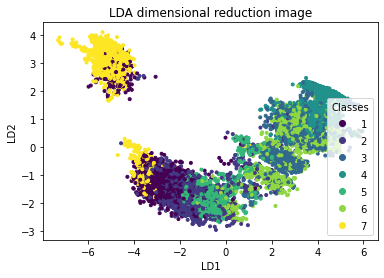

F1-score of LDA method is 0.642215687998939.


In [13]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x_train, y_train)
X_new = lda.transform(x_train)

fig, ax = plt.subplots()
scatter = ax.scatter(X_new[:, 0], X_new[:, 1], marker='.', c=y_train)
legend1 = ax.legend(*scatter.legend_elements(),loc="lower right", title="Classes")
plt.title("LDA dimensional reduction image")
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

yhat = lda.predict(x_test)
f1 = f1_score(y_test,yhat,average = 'macro')
print(f"F1-score of LDA method is {f1}.")

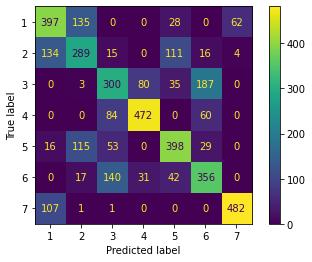

In [14]:
cm = confusion_matrix(y_test,yhat, labels=lda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lda.classes_)
disp.plot()
plt.show()

# Model 2: Random Forest Classifier

In [15]:
def rfc_cross_validation(n, k, data, n_estimators, criterion):
    """
    n : # iterations
    k : k-fold size
    data: training data
    n_estimators: the number of trees in the forest.
    criterion: criterion in random forest: {“gini”, “entropy”, “log_loss”}
    """
    scores = []
    for i in range(n):
        data.sample(frac=1)
        fold = int(data.shape[0] / k)
        for j in range(k):
            test = data[j * fold:j * fold + fold]
            train = data[~data.index.isin(test.index)]
            X_train, y_train = train.drop(
                'Cover_Type', axis=1), train['Cover_Type']
            X_test, y_test = test.drop(
                'Cover_Type', axis=1), test['Cover_Type']

            rfc = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion)
            rfc.fit(X_train, y_train)
            predictions = rfc.predict(X_test)
            true_values = y_test.to_numpy()
            score = f1_score(true_values, predictions, average='macro')
            print("The", j,"th cross-validation result of the round", i,"with n_estimators =", n_estimators,
                  "and criterion =", criterion," is", score)
            scores.append(score)
    return np.array(scores).mean()

In [16]:
%%time

n_estimators = range(100,210,10)
cross_validation_fold = 10
scores_1 = []
scores_2 = []

for n in n_estimators:
    # run cross-validation with given n_estimators n and criterion gini
    score_1 = rfc_cross_validation(1, cross_validation_fold, train, n_estimators=n, criterion="gini")
    scores_1.append(score_1)
    # run cross-validation with given n_estimators n and criterion entropy
    score_2 = rfc_cross_validation(1, cross_validation_fold, train, n_estimators=n, criterion='entropy')
    scores_2.append(score_2)

The 0 th cross-validation result of the round 0 with n_estimators = 100 and criterion = gini  is 0.8487296174766976
The 1 th cross-validation result of the round 0 with n_estimators = 100 and criterion = gini  is 0.8495051535452378
The 2 th cross-validation result of the round 0 with n_estimators = 100 and criterion = gini  is 0.8409315579541019
The 3 th cross-validation result of the round 0 with n_estimators = 100 and criterion = gini  is 0.8578767323641033
The 4 th cross-validation result of the round 0 with n_estimators = 100 and criterion = gini  is 0.8487434328426795
The 5 th cross-validation result of the round 0 with n_estimators = 100 and criterion = gini  is 0.8472033329319031
The 6 th cross-validation result of the round 0 with n_estimators = 100 and criterion = gini  is 0.854239482889441
The 7 th cross-validation result of the round 0 with n_estimators = 100 and criterion = gini  is 0.8380730714984514
The 8 th cross-validation result of the round 0 with n_estimators = 100 a

The 0 th cross-validation result of the round 0 with n_estimators = 130 and criterion = entropy  is 0.8464103181423351
The 1 th cross-validation result of the round 0 with n_estimators = 130 and criterion = entropy  is 0.8470821246831293
The 2 th cross-validation result of the round 0 with n_estimators = 130 and criterion = entropy  is 0.8336267369016115
The 3 th cross-validation result of the round 0 with n_estimators = 130 and criterion = entropy  is 0.847513095666378
The 4 th cross-validation result of the round 0 with n_estimators = 130 and criterion = entropy  is 0.8411798136835823
The 5 th cross-validation result of the round 0 with n_estimators = 130 and criterion = entropy  is 0.8588667005175168
The 6 th cross-validation result of the round 0 with n_estimators = 130 and criterion = entropy  is 0.8613020876498529
The 7 th cross-validation result of the round 0 with n_estimators = 130 and criterion = entropy  is 0.842720861655774
The 8 th cross-validation result of the round 0 wi

The 0 th cross-validation result of the round 0 with n_estimators = 170 and criterion = gini  is 0.8530601227406975
The 1 th cross-validation result of the round 0 with n_estimators = 170 and criterion = gini  is 0.8472749191693373
The 2 th cross-validation result of the round 0 with n_estimators = 170 and criterion = gini  is 0.852192939003651
The 3 th cross-validation result of the round 0 with n_estimators = 170 and criterion = gini  is 0.8580111066761772
The 4 th cross-validation result of the round 0 with n_estimators = 170 and criterion = gini  is 0.8444633207018581
The 5 th cross-validation result of the round 0 with n_estimators = 170 and criterion = gini  is 0.8449366005479507
The 6 th cross-validation result of the round 0 with n_estimators = 170 and criterion = gini  is 0.8523157744813953
The 7 th cross-validation result of the round 0 with n_estimators = 170 and criterion = gini  is 0.8350469806915672
The 8 th cross-validation result of the round 0 with n_estimators = 170 a

The 0 th cross-validation result of the round 0 with n_estimators = 200 and criterion = entropy  is 0.8577590087424581
The 1 th cross-validation result of the round 0 with n_estimators = 200 and criterion = entropy  is 0.8468384560663285
The 2 th cross-validation result of the round 0 with n_estimators = 200 and criterion = entropy  is 0.8410873798115883
The 3 th cross-validation result of the round 0 with n_estimators = 200 and criterion = entropy  is 0.856865502052826
The 4 th cross-validation result of the round 0 with n_estimators = 200 and criterion = entropy  is 0.8521426117902182
The 5 th cross-validation result of the round 0 with n_estimators = 200 and criterion = entropy  is 0.8475373508446818
The 6 th cross-validation result of the round 0 with n_estimators = 200 and criterion = entropy  is 0.846726276632566
The 7 th cross-validation result of the round 0 with n_estimators = 200 and criterion = entropy  is 0.8397834529341957
The 8 th cross-validation result of the round 0 wi

Text(0.5, 0.98, 'Random Forest Hyperparameter tuning')

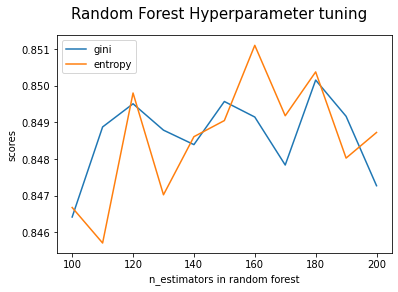

In [17]:
fig = plt.figure()
plt.plot(n_estimators, scores_1, label='gini')
plt.plot(n_estimators, scores_2, label='entropy')
plt.xlabel('n_estimators in random forest')
plt.ylabel('scores')
plt.legend()
fig.suptitle('Random Forest Hyperparameter tuning', fontsize=15)

In [18]:
clf = RandomForestClassifier(n_estimators=160, criterion="entropy")
fit = clf.fit(x_train, y_train)
pred = fit.predict(x_test)
print('F1-score of RandomForestClassifier method is ' + str(f1_score(y_test, pred, average='macro')))

F1-score of RandomForestClassifier method is 0.8504090209757288


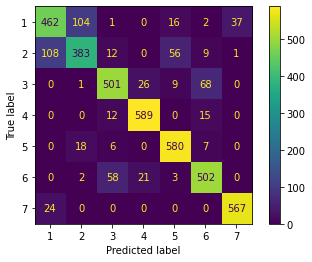

In [19]:
cm = confusion_matrix(y_test, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# Model 3: Support Vector Machine

### Standardization

In [20]:
# Taking only non-categorical values
df_xtrain_svm = pd.DataFrame(x_train)
df_xtest_svm = pd.DataFrame(x_test)
xtrain_svm_temp = df_xtrain_svm.iloc[:,:con_size]
xtest_svm_temp = df_xtest_svm.iloc[:,:con_size]

# Standardization
xtrain_svm_temp = xtrain_svm_temp.apply(lambda x : (x-np.mean(x))/np.std(x, ddof=1))
xtest_svm_temp = xtest_svm_temp.apply(lambda x : (x-np.mean(x))/np.std(x, ddof=1))

c = df_xtrain_svm.shape[1]
x_train_svm = np.concatenate((xtrain_svm_temp, df_xtrain_svm.iloc[:,con_size:c]), axis=1) # to be used for SVM
x_test_svm = np.concatenate((xtest_svm_temp, df_xtest_svm.iloc[:,con_size:c]), axis=1)

# Normalization of train data for cross_validation
train_svm = pd.DataFrame(x_train_svm)
train_svm['Cover_Type'] = y_train

### Setting parameters

In [21]:
def cross_validation_svm(n, k, data, c):
    """
    n : # iterations
    k : k-fold size
    data: training data
    c: penalty C in SVM
    """
    f1_scores = []
    acu_train_scores = []
    acu_test_scores = []
    for _ in range(0, n):
        data.sample(frac=1)
        fold = int(data.shape[0]/k)
        for j in range(k):
            test = data[j*fold:j*fold+fold]
            train = data[~data.index.isin(test.index)]
            X_train, y_train = train.iloc[:, :-1], train.iloc[:,-1]
            X_test, y_test = test.iloc[:, :-1], test.iloc[:,-1]
            
            svm = SVC(kernel="rbf", C=c, class_weight='balanced')
            svm.fit(X_train,y_train)
            acu_train = svm.score(X_train,y_train)
            y_pred = svm.predict(X_test)
            f1 = f1_score(y_test, y_pred, average='macro')
            f1_scores.append(f1)
            acu_train_scores.append(acu_train)
    return np.array(f1_scores).mean(), np.array(acu_train_scores).mean()

In [22]:
%%time
c_values = [1, 10, 100, 150, 200]
cross_validation_fold = 10
f1_scores = []
acu_train_scores = []

for c in c_values:
    # run cross-validation with given neighbor size k
    f1, acu_train = cross_validation_svm(1, cross_validation_fold, train_svm, c)
    f1_scores.append(f1)
    acu_train_scores.append(acu_train)
    print(f"The f1-score of C = {c} is {f1}.")

The f1-score of C = 1 is 0.7677367751290809.
The f1-score of C = 10 is 0.8140054524555718.
The f1-score of C = 100 is 0.8288487431139956.
The f1-score of C = 150 is 0.8277328216910365.
The f1-score of C = 200 is 0.8278007131773182.
Wall time: 4min 27s


Text(0.5, 0.98, 'SVM hyperparameter (C) tuning')

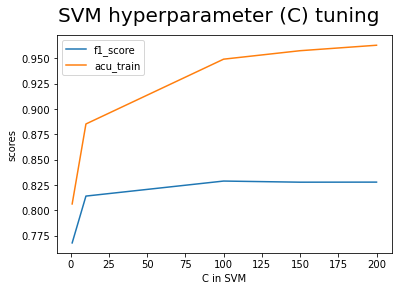

In [23]:
fig = plt.figure()
plt.plot(c_values,f1_scores, label='f1_score')
plt.plot(c_values,acu_train_scores, label='acu_train')
plt.xlabel('C in SVM')
plt.ylabel('scores')
plt.legend()
fig.suptitle('SVM hyperparameter (C) tuning', fontsize=20)

### Performance Evaluation

In [24]:
# Parameters optimized using the code in above cell
C_opt = 100 # reasonable option
svm = SVC(C=C_opt, kernel='rbf', class_weight='balanced')
svm.fit(x_train_svm,y_train)

SVC(C=100, class_weight='balanced')

In [25]:
y_pred = svm.predict(x_test_svm)
f1_svm = f1_score(y_test, y_pred, average='macro')
print(f"F1-score of SVM method is {f1_svm}.")

F1-score of SVM method is 0.8244253306411587.


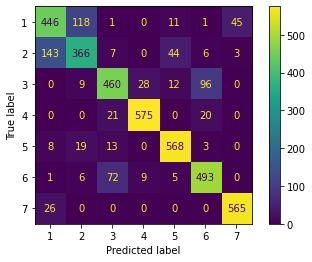

In [26]:
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.show()

# Model 4: K-Nearest Neighbours

In [27]:
def cross_validation_KNN(n, k, data, n_neighbors, metric):
    """
    n : # iterations
    k : k-fold size
    data: training data
    n_neighbors: k in knn
    """
    scores = []
    for _ in range(0, n):
        data.sample(frac=1)
        fold = int(data.shape[0]/k)
        for j in range(k):
            test = data[j*fold:j*fold+fold]
            train = data[~data.index.isin(test.index)]
            X_train, y_train = train.drop(
                'Cover_Type', axis=1), train['Cover_Type']
            X_test, y_test = test.drop(
                'Cover_Type', axis=1), test['Cover_Type']

            knn = KNeighborsClassifier(metric=metric, n_neighbors=n_neighbors)
            knn.fit(X_train, y_train)
            predictions = knn.predict(X_test)
            true_values = y_test.to_numpy()
            score = f1_score(true_values, predictions, average='macro')

            scores.append(score)
    return np.array(scores).mean()

In [28]:
neigh = KNeighborsClassifier()
neigh.fit(x_train, y_train)
neigh_val_pred = neigh.predict(x_test)
f1_score(y_test, neigh_val_pred, average='macro')

0.7805055539948383

In [29]:
%%time
k_values = np.arange(1, 6)
cross_validation_fold = 10
scores_1 = []
scores_2 = []

for k in k_values:
    # run cross-validation with ecuclidean distance
    score_1 = cross_validation_KNN(1, cross_validation_fold, train, k, 'euclidean')
    scores_1.append(score_1)
    # run cross-validation with manhattan distance
    score_2 = cross_validation_KNN(1, cross_validation_fold, train, k, 'manhattan')
    scores_2.append(score_2)
print(scores_1)
print(scores_2)

[0.8185259109590557, 0.7970790309380765, 0.7881583965043204, 0.7774435760191467, 0.768034207382695]
[0.8290576842491351, 0.802962240698972, 0.8031565449608398, 0.7896220173980453, 0.7886350949558457]
Wall time: 27.6 s


Text(0.5, 0.98, 'kNN hyperparameter (k) tuning')

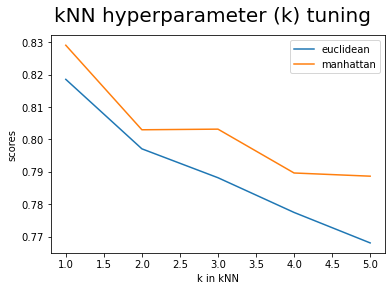

In [30]:
fig = plt.figure()
plt.plot(k_values,scores_1,label='euclidean')
plt.plot(k_values,scores_2,label='manhattan')
plt.xlabel('k in kNN')
plt.ylabel('scores')
plt.legend()
fig.suptitle('kNN hyperparameter (k) tuning', fontsize=20)

In [31]:
# n_neighbors = 1 is a reasonable option
neigh = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
neigh.fit(x_train, y_train)
neigh_val_pred = neigh.predict(x_test)
f1_knn = f1_score(y_test, neigh_val_pred, average='macro')
print(f"F1-score of KNN method is {f1_knn}.")

F1-score of KNN method is 0.8348903213289572.


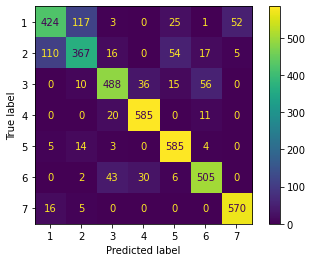

In [32]:
cm = confusion_matrix(y_test, neigh_val_pred, labels=neigh.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()
plt.show()